0.9766
0.9781235904375282
0.9693786320965578
0.973731477323754


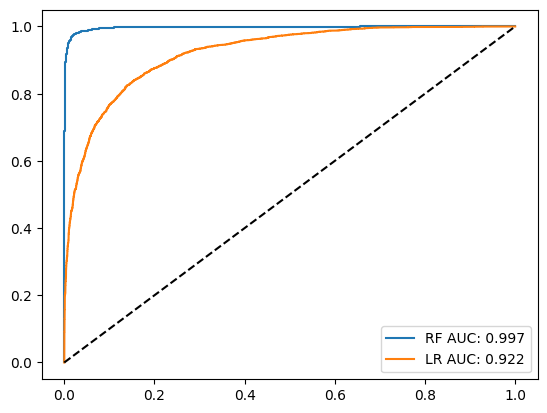

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

rng = np.random.default_rng(123)
n = 10000
actual = rng.binomial(1, 0.45, size=n)
rf_score = 0.2 + 0.6*actual + rng.normal(0, 0.15, size=n)
rf_score = np.clip(1/(1+np.exp(-(rf_score*2-1))), 0, 1)
lr_score = 0.3 + 0.4*actual + rng.normal(0, 0.20, size=n)
lr_score = np.clip(1/(1+np.exp(-(lr_score*2-1))), 0, 1)
df = pd.DataFrame({'actual_label': actual.astype(int),
                   'model_RF': rf_score,
                   'model_LR': lr_score})
df['predicted_RF'] = (df.model_RF >= 0.5).astype(int)
df['predicted_LR'] = (df.model_LR >= 0.5).astype(int)

def startsev_find_TP(y_true, y_pred): return int(((y_true==1)&(y_pred==1)).sum())
def startsev_find_FN(y_true, y_pred): return int(((y_true==1)&(y_pred==0)).sum())
def startsev_find_FP(y_true, y_pred): return int(((y_true==0)&(y_pred==1)).sum())
def startsev_find_TN(y_true, y_pred): return int(((y_true==0)&(y_pred==0)).sum())

def startsev_find_conf_matrix_values(y_true, y_pred):
    TP = startsev_find_TP(y_true,y_pred)
    FN = startsev_find_FN(y_true,y_pred)
    FP = startsev_find_FP(y_true,y_pred)
    TN = startsev_find_TN(y_true,y_pred)
    return TP,FN,FP,TN

def startsev_accuracy_score(y_true, y_pred):
    TP,FN,FP,TN = startsev_find_conf_matrix_values(y_true,y_pred)
    return (TP+TN)/(TP+TN+FP+FN)

def startsev_recall_score(y_true, y_pred):
    TP,FN,FP,TN = startsev_find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FN) if (TP+FN)>0 else 0.0

def startsev_precision_score(y_true, y_pred):
    TP,FN,FP,TN = startsev_find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FP) if (TP+FP)>0 else 0.0

def startsev_f1_score(y_true, y_pred):
    r = startsev_recall_score(y_true,y_pred)
    p = startsev_precision_score(y_true,y_pred)
    return 2*p*r/(p+r) if (p+r)>0 else 0.0

y_true = df.actual_label.values
y_rf = df.predicted_RF.values
print(startsev_accuracy_score(y_true, y_rf))
print(startsev_recall_score(y_true, y_rf))
print(startsev_precision_score(y_true, y_rf))
print(startsev_f1_score(y_true, y_rf))
fpr_RF, tpr_RF, _ = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, _ = roc_curve(df.actual_label.values, df.model_LR.values)
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
plt.figure()
plt.plot(fpr_RF, tpr_RF, label=f'RF AUC: {auc_RF:.3f}')
plt.plot(fpr_LR, tpr_LR, label=f'LR AUC: {auc_LR:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()
